In [44]:
import quandl 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #takes our data and puts it into the training and testing portion
from sklearn import preprocessing #standardizes our data
from sklearn.linear_model import LinearRegression



#imports our data such that the cells are split; imports are in the first cell and data frame in second cell 
#therefore we only call our API once


quandl.ApiConfig.api_key= 'mdYo9zRmxK633gpLQhNv'

df= quandl.get("WIKI/AMZN")
df= df[['Adj. Close']]
df



,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


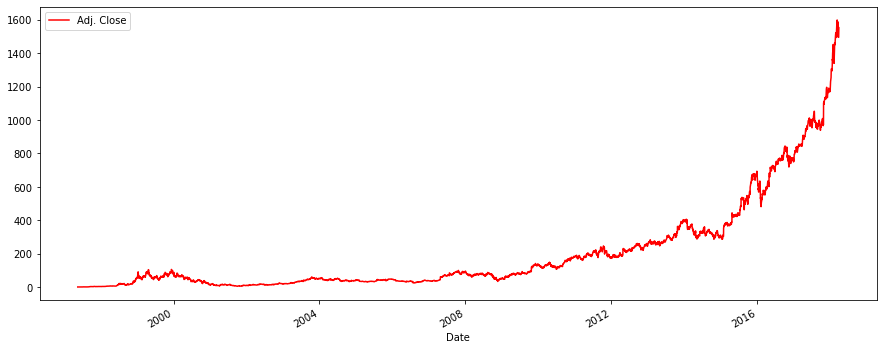

In [12]:
df['Adj. Close'].plot(figsize=(15,6), color='r')
plt.legend(loc='upper left')
plt.show()

In [28]:
#in ML, the "features" are the x-labels, or the inputs to the function
#y stands for labels and those are the outputs

forecast= 30 #all this means is that we are only using ML to predict up to 30 days in the future.
df['Prediction']= df[['Adj. Close']].shift(-forecast)

#For the next step, we will take all the values of both our Adj. Close colomn and our prediction colomn excluding the last 30 days
#These will be the X and Y values of our dataset
X= np.array(df.drop(['Prediction'],1))
X= preprocessing.scale(X) 

#when we standardize our data set, this means that we ensure that the mean is 0 or approximates 0 and that the standard deviation is 1






C:\Users\farag\AppData\Local\Temp\ipykernel_4900\2941411588.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= np.array(df.drop(['Prediction'],1))


1.0

In [29]:
#splice the arrays into X_forecast which are the last 30 days that have no corresponding label

X_forecast = X[-forecast:] 

#re-assign A to be the rest of the values. Repeat for the Labels/Y values

X=X[:-forecast ]

y= np.array(df['Prediction'])
y=y[:-forecast]


In [31]:
#Applying Linear Regression
#Linear regression works by finding the line of best fit that minimizes the distance between different points and the line

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)
clf=LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

0.9877236431162799

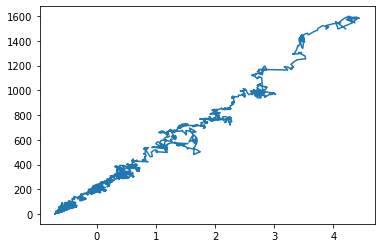

In [35]:
plt.plot(X,y)


confidence =clf.score(X_test
                      , y_test) #confidence is the mean accuracy of a given ML model, ranging from -1 to 1 

confidence


In [36]:
#a confidence which is close to 1 is considered very good
# for linear regression, this would basically mean that the data we are basing our prediction on is very linear and therefore, using linear regression an accurate tool

#Prediction Step

predicted_values= clf.predict(X_forecast)
print(predicted_values)

[1501.40885496 1540.2888973  1551.68477178 1537.77776156 1558.69679912
 1574.19987019 1576.15770483 1592.37368308 1615.72937354 1605.12088909
 1605.62098815 1585.40421737 1592.63969323 1617.49568089 1632.42417005
 1640.25550863 1647.55482692 1676.31584347 1697.06463454 1686.20078034
 1689.20137474 1679.96550261 1668.64411097 1640.18102579 1684.42383259
 1679.47604395 1639.29787212 1587.64934296 1651.81098919 1589.23476341]


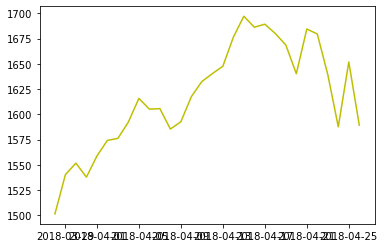

(17281.0, 18029.5)

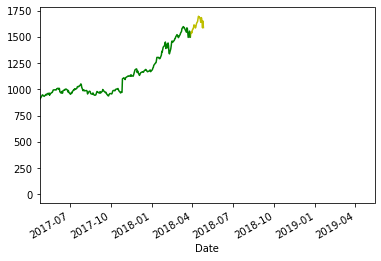

In [49]:
datess= pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(datess, predicted_values, color='y')


df['Adj. Close'].plot(color='g')

plt.xlim(xmin=datetime.date(2017,4,25))